## Missing Values Überblick

In diesem Notebook schauen wir uns die 6 UNHCR-CSV-Dateien kurz an und prüfen, wo Werte fehlen.
Das hilft uns zu entscheiden, welche Jahre/Spalten wir später für Analysen und Plots sinnvoll nutzen können.

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns

In [25]:
def mark_missing(df, custom=("Various/Unknown","Various/unknown","Unknown","N/A",""," ","NaN")):
    """True = missing (NaN or custom placeholders)."""
    df2 = df.replace(list(custom), np.nan)
    return df2.isna()

def missing_heatmap(df, group_col="Year", interval=5,title=""):
    """Simple Seaborn heatmap of % missing values grouped by N-year intervals."""
    if group_col not in df.columns:
        raise ValueError(f"{group_col} not in DataFrame.")

    
    cols = [c for c in df.columns if c != group_col]

    #fehlende Werte markieren
    miss = mark_missing(df[cols])

    grp = (df[group_col] // interval) * interval
    label = f"{interval}-year group"

    #fehlende interval Prozente berechnen
    grouped = miss.groupby(grp).mean() * 100
    grouped.index.name = label

    #heatmap plotten
    plt.figure(figsize=(8,5))
    sns.heatmap(grouped, cmap="viridis", cbar_kws={"label": "% missing"})
    plt.title(title)
    plt.xlabel("Columns")
    plt.ylabel(label)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    return grouped

## time_series.csv

/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_38489/664405581.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_time_series=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/time_series.csv")


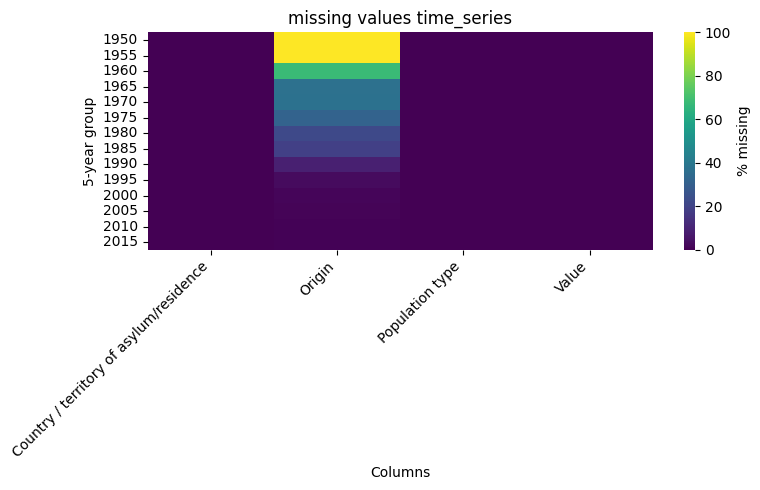

,Country / territory of asylum/residence,Origin,Population type,Value
5-year group,,,,
1950,0.0,100.000000,0.0,0.0
1955,0.0,100.000000,0.0,0.0
1960,0.0,67.857143,0.0,0.0
1965,0.0,36.811594,0.0,0.0
1970,0.0,37.477477,0.0,0.0
1975,0.0,31.473534,0.0,0.0
1980,0.0,22.171946,0.0,0.0
1985,0.0,18.857143,0.0,0.0
1990,0.0,8.902726,0.0,0.0


In [26]:
data_time_series=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/time_series.csv")
missing_heatmap(data_time_series, group_col="Year", interval=5,title="missing values time_series")


## demogroahics.csv

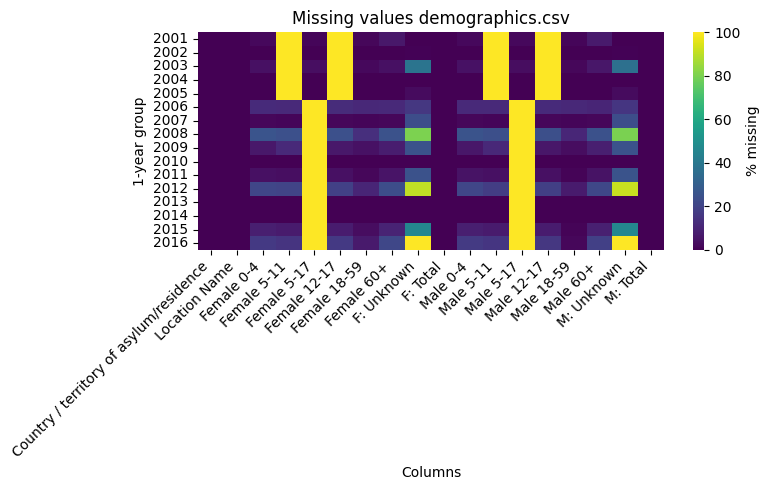

,Country / territory of asylum/residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
1-year group,,,,,,,,,,,,,,,,,,
2001,0.0,0.000000,2.197802,100.000000,1.465201,100.000000,1.648352,6.410256,0.000000,0.0,2.014652,100.000000,2.014652,100.000000,1.465201,6.959707,0.000000,0.0
2002,0.0,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.649351,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.649351,0.0
2003,0.0,0.000000,4.192547,100.000000,3.726708,100.000000,2.329193,4.192547,38.509317,0.0,4.347826,100.000000,3.260870,100.000000,1.863354,6.211180,36.490683,0.0
2004,0.0,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0
2005,0.0,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,3.083110,0.0,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,3.083110,0.0
2006,0.0,0.000000,11.881188,11.661166,100.000000,12.211221,11.111111,11.551155,15.731573,0.0,11.551155,11.551155,100.000000,11.881188,11.111111,10.451045,15.621562,0.0
2007,0.0,0.000000,1.608040,1.507538,100.000000,1.608040,1.507538,1.809045,23.316583,0.0,1.708543,1.507538,100.000000,1.608040,1.507538,1.809045,23.216080,0.0
2008,0.0,0.099800,25.848303,24.451098,100.000000,24.251497,13.572854,25.149701,80.239521,0.0,25.748503,24.151697,100.000000,23.952096,10.778443,24.850299,79.940120,0.0
2009,0.0,0.000000,6.250000,11.397059,100.000000,6.617647,4.319853,8.180147,25.275735,0.0,6.066176,11.305147,100.000000,5.974265,3.216912,8.363971,25.000000,0.0


In [27]:
data_demographics = pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/demographics.csv")
missing_heatmap(data_demographics, group_col="Year", interval=1,title="Missing values demographics.csv")

## resettlement.csv

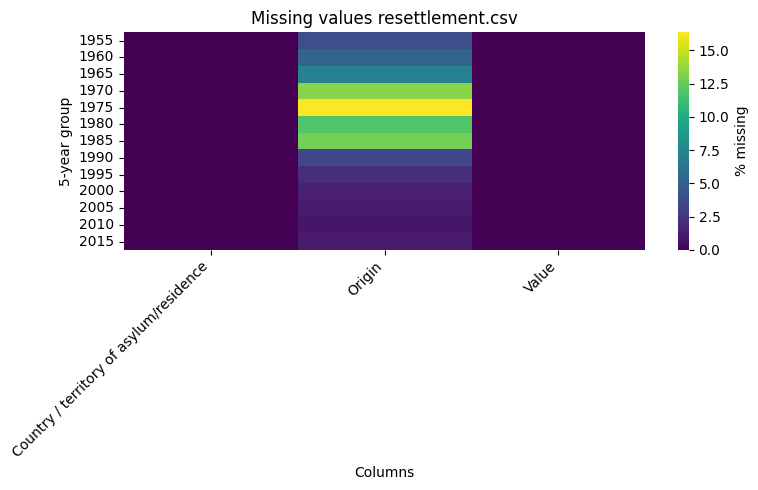

,Country / territory of asylum/residence,Origin,Value
5-year group,,,
1955,0.0,3.846154,0.0
1960,0.0,5.208333,0.0
1965,0.0,7.246377,0.0
1970,0.0,13.432836,0.0
1975,0.0,16.363636,0.0
1980,0.0,11.913357,0.0
1985,0.0,12.868633,0.0
1990,0.0,3.417266,0.0
1995,0.0,2.170418,0.0


In [28]:
data_resettlement = pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/resettlement.csv")
missing_heatmap(data_resettlement, group_col="Year", interval=5,title= "Missing values resettlement.csv")

## asylum seekers monthly


/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_38489/3722881680.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_asylum_monthly=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/asylum_seekers_monthly.csv")


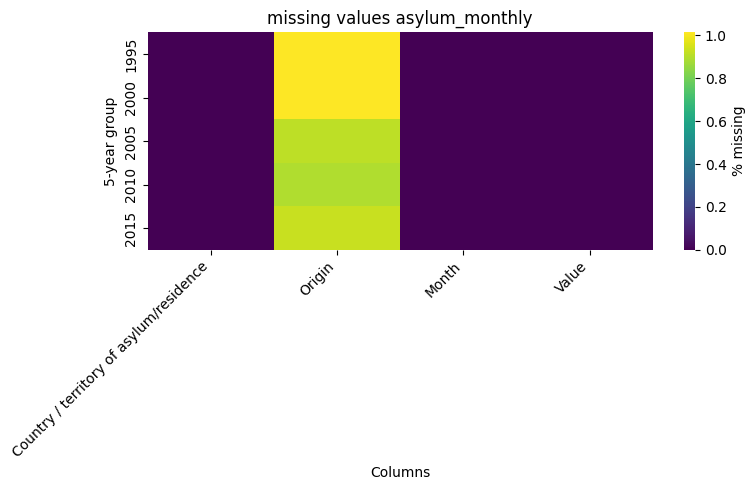

,Country / territory of asylum/residence,Origin,Month,Value
5-year group,,,,
1995,0.0,1.009882,0.0,0.0
2000,0.0,1.013475,0.0,0.0
2005,0.0,0.910920,0.0,0.0
2010,0.0,0.892022,0.0,0.0
2015,0.0,0.927648,0.0,0.0


In [29]:
data_asylum_monthly=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/asylum_seekers_monthly.csv")
missing_heatmap(data_asylum_monthly, group_col="Year", interval=5,title="missing values asylum_monthly")

## asylum seekers.csv


/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_38489/2045384717.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_asylum=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/asylum_seekers.csv")


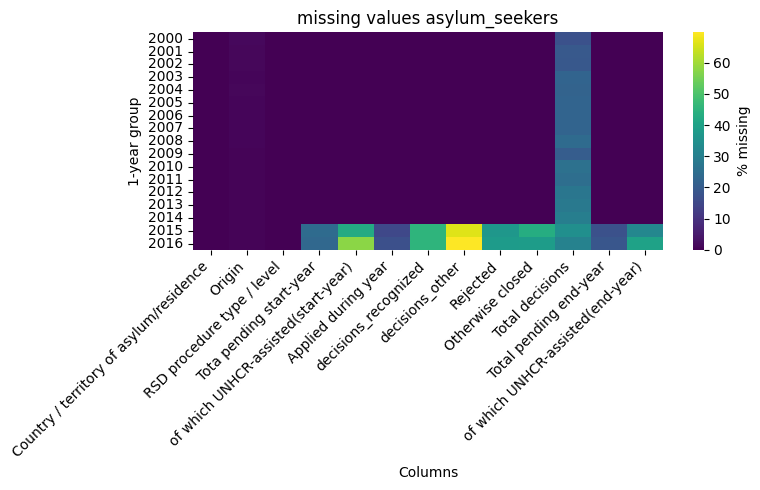

,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
1-year group,,,,,,,,,,,,,
2000,0.0,1.416650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.174461,0.000000,0.000000
2001,0.0,1.353302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.126669,0.000000,0.000000
2002,0.0,1.330604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.816104,0.000000,0.000000
2003,0.0,1.022173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.063217,0.000000,0.000000
2004,0.0,1.105893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.845175,0.000000,0.000000
2005,0.0,1.011754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.243714,0.000000,0.000000
2006,0.0,0.931490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.175481,0.000000,0.000000
2007,0.0,0.953206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.212594,0.000000,0.000000
2008,0.0,0.823630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.027265,0.000000,0.000000


In [30]:
data_asylum=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/asylum_seekers.csv")
missing_heatmap(data_asylum, group_col="Year", interval=1,title="missing values asylum_seekers")

# persons_of_concern.csv

/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_38489/67350619.py:1: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_perspon_of_concern=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/persons_of_concern.csv")


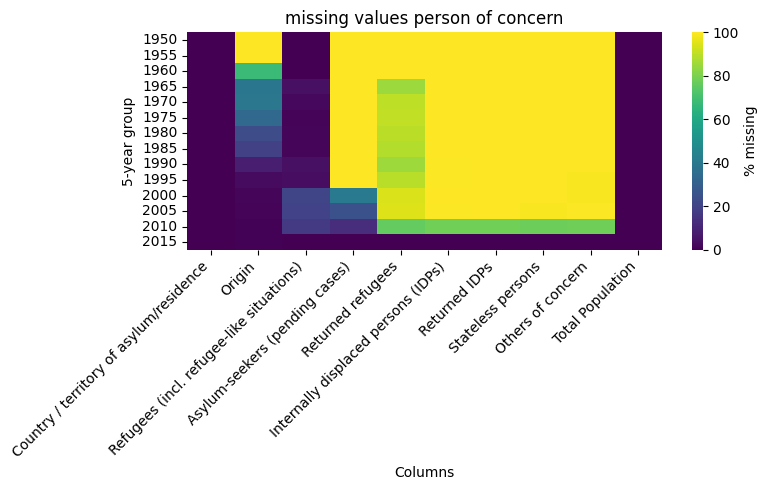

,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
5-year group,,,,,,,,,,
1950,0.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
1955,0.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
1960,0.0,67.857143,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
1965,0.0,39.228296,4.180064,100.000000,84.887460,100.000000,100.000000,100.000000,100.000000,0.0
1970,0.0,39.728682,2.325581,100.000000,90.116279,100.000000,100.000000,100.000000,100.000000,0.0
1975,0.0,33.385093,1.086957,100.000000,90.372671,100.000000,100.000000,100.000000,100.000000,0.0
1980,0.0,22.760887,1.314708,100.000000,89.728841,100.000000,100.000000,100.000000,100.000000,0.0
1985,0.0,19.325329,1.486564,100.000000,88.450543,100.000000,100.000000,100.000000,100.000000,0.0
1990,0.0,8.539326,3.951311,100.000000,85.337079,99.438202,100.000000,100.000000,100.000000,0.0


In [31]:
data_perspon_of_concern=pd.read_csv("/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/persons_of_concern.csv")
missing_heatmap(data_perspon_of_concern, group_col="Year", interval=5,title="missing values person of concern")

## Fazit

Über alle untersuchten UNHCR-Datensätze hinweg zeigt sich, dass fehlende Werte vor allem die Variable Origin betreffen. In vielen Fällen fehlen ganze Herkunftsländer für bestimmte Jahre, während die zugehörigen Zielstaaten und Fallzahlen vollständig vorhanden sind.

Wir haben uns bewusst dagegen entschieden, fehlende Origin-Werte zu imputieren oder künstlich zu ergänzen. Das Einsetzen von Ländern oder das Ableiten von Herkunftsangaben würde Annahmen erzwingen, die nicht durch die Daten gedeckt sind, und die Ergebnisse verfälschen.

Stattdessen lassen wir fehlende Origin-Einträge bewusst leer und arbeiten mit den vorhandenen Informationen weiter. Dieser Ansatz ist transparenter, vermeidet künstliche Verzerrungen und erlaubt es dennoch, belastbare Aussagen über zeitliche Entwicklungen, Zielregionen und relative Flüchtlingsströme zu treffen.
